Author: Amina Nsanza 
Class: 5550 Data Science and Climate Change. 
Project: Rising Temperature Impact on Energy Poverty
Code Source: Cleaning and Tidying Datasets

In [2]:
import pandas as pd 
import polars as pl 
import numpy as np
import matplotlib.pyplot as plt


Probelm Statement & Data Collection and Refinement. 

 The ongoing rise in global temperatures has led to significant environmental impacts, from severe weather events to energy surplus and poverty. One notable consequence is the increase in energy poverty– a lack of access to modern, reliable, and affordable energy services, including electricity and clean cooking facilities. This issue disproportionately affects low-income and rural communities and exacerbates existing inequalities. This project aims to establish the correlation between rising global temperatures and energy poverty while predicting future energy poverty indexes based on temperature projections. Understanding this relationship is crucial in anticipating how energy poverty may increase in response to global temperatures, thereby informing policy decisions and targeting interventions for vulnerable populations.



The data used in this project will be from various sources:  The World Bank, The Intergovernmental Panel on Climate Change (IPCC), CEIC Data, the National Oceanic and Atmospheric Administration (NOAA), and Enerdata. 


Energy Poverty Index Dataset

In [11]:

path = 'Raw_Data/World_Bank_Poverty_Indices/API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_62.csv'

#Initial dataset access to electricty % of population

access_elec_df = pd.read_csv(path, skiprows=4)  # Skipping metadata rows
print(access_elec_df.head())

access_elec_df.shape


                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                            Indicator Name  Indicator Code  1960  1961  1962  \
0  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   
1  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   
2  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   
3  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   
4  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   

   1963  1964  1965  ...        2015        2016        2017        2018  \
0   NaN   NaN   NaN  ...  100.000000  100.000000  100.000000  100.000000   
1   NaN   NaN   NaN  ...   33.903800   38.854624   40.199898   43.017148   
2   NaN 

(266, 69)

In [ ]:
#Cleaning the data 

#Dropping null years (1960 - 1989 & 2023 and last col)

columns_to_drop = [col for col in access_elec_df.columns if col.startswith(tuple(str(year) for year in range(1960, 1990)))]

access_elec_df = access_elec_df.drop(columns=columns_to_drop, axis=1)

access_elec_df = access_elec_df.drop(columns=['2023', 'Unnamed: 68'], errors='ignore') #These cols are also empty
access_elec_df.columns.tolist()

#access_elec_df.shape



['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [15]:
#Checking for Nulls in Countries and countries with nulls 50% empty years will be dropped. 

year_columns = [col for col in access_elec_df.columns if col.isdigit()]  

countries_na = access_elec_df[access_elec_df[year_columns].isnull().any(axis=1)]
countries_na['Null Count'] = countries_na[year_columns].isnull().sum(axis=1)

#Count of NAs per country 
countries_na_summary = countries_na[['Country Name', 'Country Code', 'Null Count']]

# Sort by the number of null values for better analysis
countries_na_summary = countries_na_summary.sort_values(by='Null Count', ascending=False)

countries_na_summary


/var/folders/19/lj7m40r97fj5_hs7nfmzyf880000gn/T/ipykernel_8886/3541968494.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_na['Null Count'] = countries_na[year_columns].isnull().sum(axis=1)


,Country Name,Country Code,Null Count
11,American Samoa,ASM,33
110,Not classified,INX,33
261,Kosovo,XKX,23
193,"Korea, Dem. People's Rep.",PRK,19
216,South Sudan,SSD,17
...,...,...,...
106,Indonesia,IDN,1
33,Botswana,BWA,1
42,Cameroon,CMR,1
59,Dominican Republic,DOM,1


In [ ]:
#Countries with more than 16 years of NAs 

countries_NA = countries_na_summary[countries_na_summary['Null Count'] > 16]
print(countries_NA)


#Dropping these countries 
countires_dropped = countries_NA['Country Code']  # List of country codes to drop
access_elec_df = access_elec_df[~access_elec_df['Country Code'].isin(countires_dropped)]

access_elec_df.shape

                  Country Name Country Code  Null Count
11              American Samoa          ASM          33
110             Not classified          INX          33
261                     Kosovo          XKX          23
193  Korea, Dem. People's Rep.          PRK          19
216                South Sudan          SSD          17
131                    Liberia          LBR          17


(260, 37)

In [ ]:
access_elec_df.head() 

#Seems a lot of cols also have Nas in the earlier years deciding whether to drop them or not 

na_per_year = access_elec_df[year_columns].isnull().sum()

# Converting the result into a DataFrame for better readability
na_per_year_df = na_per_year.reset_index()
na_per_year_df.columns = ['Year', 'NA Count']

na_per_year_df


#1990 - 1992 Have a lot of NAs > 50% These 

,Year,NA Count
0,1990,154
1,1991,143
2,1992,126
3,1993,111
4,1994,105
5,1995,98
6,1996,83
7,1997,76
8,1998,67
9,1999,58


In [ ]:
#Dropping the cols with 50%> NAs 

years_to_drop = na_per_year[na_per_year > 125].index.tolist()

access_elec_df = access_elec_df.drop(columns=years_to_drop, axis=1)

remaining_years = [col for col in access_elec_df.columns if col.isdigit()]

remaining_years #Checks out 

['1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [31]:
#Saving the cleaned df prior to applying bootstrap

path = 'Cleaned_Data/cleaned_energy_poverty_index.csv'
access_elec_df.to_csv(path, index=False)

In [33]:
#For other NA values using bootsrapping to fill the NAs

#Countries with NAs 
#access_elec_df.columns

#getting the year columns in the dataset
year_columns = [col for col in access_elec_df.columns if col.isdigit()]

# Applying bootstrapping to fill missing vals
def bootstrap_fill(df, year_columns):
    for col in year_columns:
        # Getting non NA values n
        non_na_values = df[col].dropna()
        # Using the non NAs to do random resampling for the values with NA 
        df[col] = df[col].apply(lambda x: np.random.choice(non_na_values) if pd.isnull(x) else x)
    return df

# Creating a bootstrapped version of the dataset
access_elec_bt_df = access_elec_df.copy()
access_elec_bt_df = bootstrap_fill(access_elec_bt_df, year_columns)

# Extracting og and bootstrapped values to compare
og_vals = access_elec_df[year_columns].stack()
bt_vals = access_elec_bt_df[year_columns].stack()



In [39]:
access_elec_bt_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.239914,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.900000
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,99.989120,100.000000,100.000000,96.109337,73.246956,...,31.703057,31.860474,33.903800,38.854624,40.199898,43.017148,44.381259,46.264875,48.100862,48.711995
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,37.826469,100.000000,77.883000,100.000000,100.000000,...,68.000000,89.500000,71.500000,97.700000,97.700000,93.400000,97.700000,97.700000,97.700000,85.300000
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,31.575130,32.609692,33.605668,32.629322,32.461797,33.458630,...,47.058476,47.662536,46.758739,50.906115,48.789457,51.211055,51.168083,51.730899,54.224724,55.437577
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,50.900000,68.018555,100.000000,14.500000,82.029404,100.000000,...,38.400000,32.000000,42.000000,41.800000,42.900000,45.300000,45.600000,47.000000,48.200000,48.500000


In [44]:
#Saving the boot_strapped 

path = 'Cleaned_Data/cleaned_energy_poverty_index_bt.csv'
access_elec_bt_df.to_csv(path, index=False)

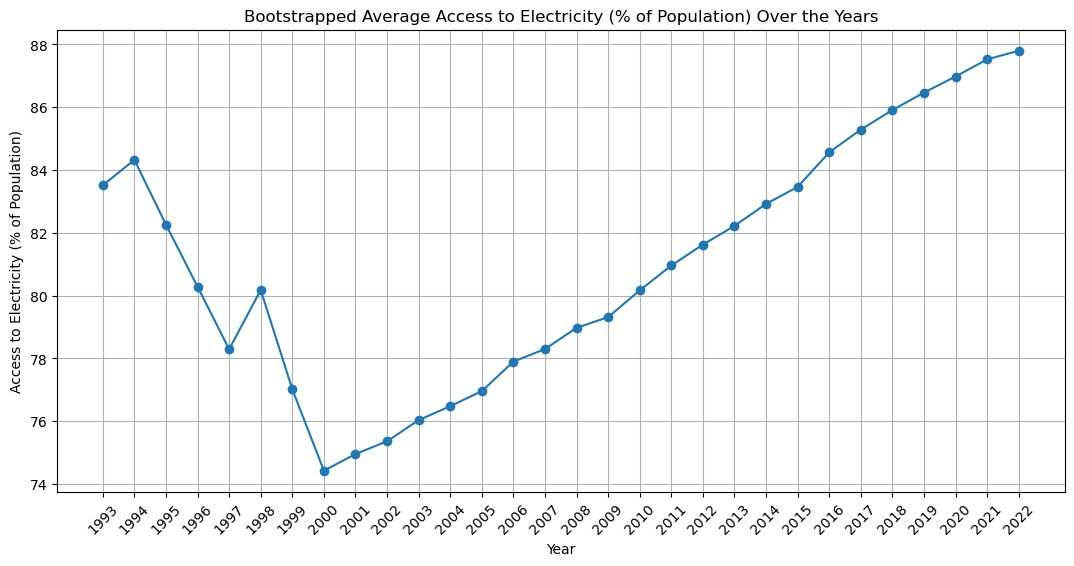

In [ ]:
# Getting year columns 
year_columns = [col for col in access_elec_bt_df.columns if col.isdigit()]

# Calculating the mean access to electricity for all countries per year
mean_access_per_year = access_elec_bt_df[year_columns].mean()


plt.figure(figsize=(13, 6))
plt.plot(mean_access_per_year.index, mean_access_per_year.values, marker='o', linestyle='-')
plt.title('Bootstrapped Average Access to Electricity (% of Population) Over the Years')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (% of Population)')
plt.grid(True)
plt.xticks(ticks=mean_access_per_year.index, labels=mean_access_per_year.index, rotation=45)

plt.show()

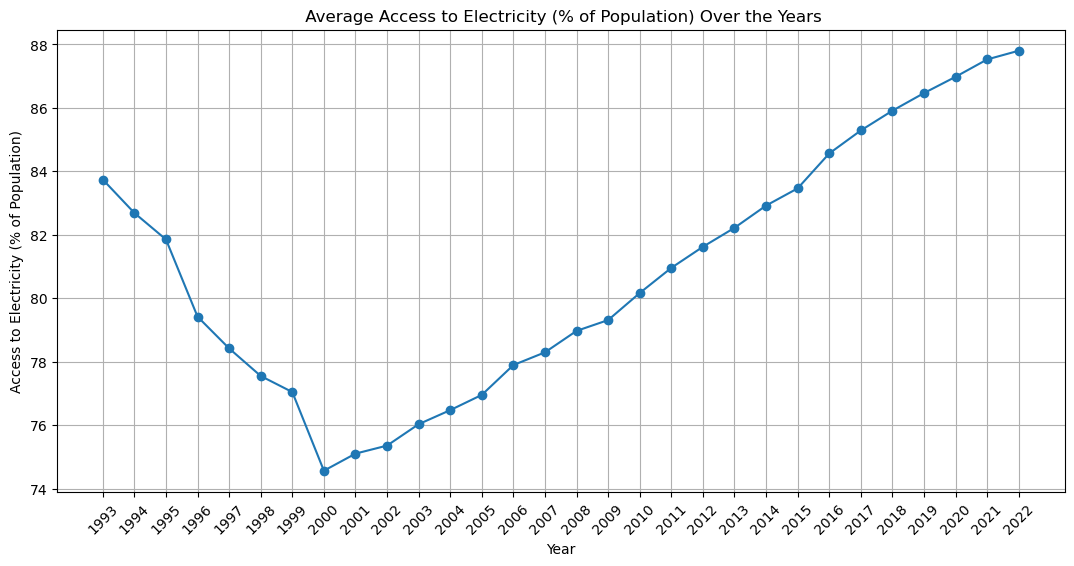

In [ ]:
# Getting year columns 
year_columns = [col for col in access_elec_df.columns if col.isdigit()]

# Calculating the mean access to electricity for all countries per year
mean_access_per_year = access_elec_df[year_columns].mean()


#The trend over the years
plt.figure(figsize=(13, 6))
plt.plot(mean_access_per_year.index, mean_access_per_year.values, marker='o', linestyle='-')
plt.title(' Average Access to Electricity (% of Population) Over the Years')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (% of Population)')
plt.grid(True)
plt.xticks(ticks=mean_access_per_year.index, labels=mean_access_per_year.index, rotation=45)
plt.show()

Conclusion on this Dataset: This dataset showcased an increase in energy accessibility per % of population and this energy poverty index could not be used because factors like country develpoment contribute to the number of individuals that have access to energy. Instead another Energy Poverty Index was going to be created (Using Energy Prices & Global National  Income) 

Cleaning the Energy Price Data (2014 - 2019)

In [ ]:

path = 'Raw_Data/P_Data_Extract_From_Doing_Business/36b3e48f-46ad-4de7-899c-c8861482c822_Data.csv'
energy_price_df = pd.read_csv(path, encoding='ISO-8859-1')
energy_price_df.head()






,Series Name,Series Code,Country Name,Country Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Getting electricity: Price of electricity (US ...,IC.ELC.PRI.KH.DB1619,Beijing,CHN_BEI,..,..,..,..,14.1,14.3,13.9,18.7,17.4,16.7
1,Getting electricity: Price of electricity (US ...,IC.ELC.PRI.KH.DB1619,Chittagong,BGD_CHI,..,..,..,..,9.3,9,9.3,9.2,9.3,10.9
2,Getting electricity: Price of electricity (US ...,IC.ELC.PRI.KH.DB1619,Delhi,IND_DEL,..,..,..,..,20.3,19.8,16,15.2,14.9,16.3
3,Getting electricity: Price of electricity (US ...,IC.ELC.PRI.KH.DB1619,Dhaka,BGD_DHA,..,..,..,..,9.3,9,9.3,9.2,9.2,9.4
4,Getting electricity: Price of electricity (US ...,IC.ELC.PRI.KH.DB1619,Jakarta,IDN_JAK,..,..,..,..,14.2,13.7,11,11.1,10.7,10.7


In [ ]:

# Cleaninng the cols so its only numerical years. 
year_columns = [col for col in energy_price_df.columns if col.startswith('19') or col.startswith('20')]
renamed_columns = {col: int(col.split(' ')[0]) for col in year_columns}  
energy_price_df.rename(columns=renamed_columns, inplace=True)

# dropping years 2010 to 2013 as they are mostly empty
columns_to_drop = [col for col in energy_price_df.columns if isinstance(col, int) and 2010 <= col <= 2013]
energy_price_df = energy_price_df.drop(columns=columns_to_drop, errors='ignore')

# dropping series same and series code cols 
energy_price_df = energy_price_df.drop(columns=['Series Name', 'Series Code'], errors='ignore')

#dropping na values 


energy_price_df.columns.tolist()

['Country Name', 'Country Code', 2014, 2015, 2016, 2017, 2018, 2019]

In [3]:
energy_price_df.head()

#Saving the cleaned df 
path = 'Cleaned_Data/cleaned_energy_price.csv'
energy_price_df.to_csv(path, index=False)


NameError: name 'energy_price_df' is not defined

Further Cleaning and Combining Energy Prices. 

In [31]:

path = 'Cleaned_Data/cleaned_energy_price.csv'
energy_price_df = pd.read_csv(path)

#Diving it by 100 -> USD Cents per Kwh 
years = ['2014', '2015', '2016', '2017', '2018', '2019']
energy_price_df[years] = energy_price_df[years].apply(pd.to_numeric, errors='coerce')

energy_price_df[years] = energy_price_df[years] / 100

energy_price_df.tail(7)




,Country Name,Country Code,2014,2015,2016,2017,2018,2019
211,Zambia,ZMB,0.045,0.048,0.038,0.047,0.047,0.046
212,Zimbabwe,ZWE,0.125,0.105,0.125,0.121,0.119,0.124
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:


#Energy Prices 2021
energy_price_2021_df = pd.read_excel('Raw_Data/Electricity_Prices/Electricity_Prices2021.xlsx')

energy_price_2021_df.head()


#Drop rank col & Country code col 
energy_price_2021_df = energy_price_2021_df.drop(columns=['Rank', 'Country code'])

#Rename Coutry name -> Country Name  &  Changing Avg Price 1KW/h (USD) -> 2021 

energy_price_2021_df = energy_price_2021_df.rename(columns={
    'Country name': 'Country Name',
    'Average price of 1KW/h (USD)': '2021'
})

#Saving the cleaned csv 
path = 'Cleaned_Data/cleaned_electricity_prices2021.csv'
energy_price_2021_df.to_csv(path, index=False)


In [42]:
#Joining 2014 - 2019 + 2021  by Country 
#energy_price_2021_df.shape 230 Countries 
#energy_price_df.shape 218 Countries 

#Join both datasets  left to keep most of the countries
energy_prices_2014_2021 = pd.merge(energy_price_df, energy_price_2021_df, on='Country Name', how='left')


energy_prices_2014_2021.shape




(218, 10)

In [43]:
#Saving 

energy_prices_2014_2021.sort_values(by='Country Name')
path = 'Cleaned_Data/energy_prices_2014_2021.csv'
energy_prices_2014_2021.to_csv(path, index=False)


In [44]:
#Drop rows 2 - 23 there cities not countries 
energy_prices_2014_2021 = energy_prices_2014_2021.drop(energy_prices_2014_2021.index[0:22])

energy_prices_2014_2021.head()



,Country Name,Country Code,2014,2015,2016,2017,2018,2019,Continental region,2021
22,Afghanistan,AFG,0.233,0.220,0.209,0.186,0.176,0.180,ASIA (EX. NEAR EAST),0.064969
23,Albania,ALB,0.095,0.102,0.096,0.091,0.087,0.094,EASTERN EUROPE,0.115875
24,Algeria,DZA,0.027,0.027,0.030,0.026,0.022,0.021,NORTHERN AFRICA,0.032792
25,Angola,AGO,0.047,0.046,0.088,0.060,0.046,0.037,SUB-SAHARAN AFRICA,0.012713
26,Antigua and Barbuda,ATG,0.507,0.445,0.442,0.432,0.437,0.449,CARIBBEAN,0.367061


In [53]:
energy_prices_2014_2021.shape

(196, 10)

In [50]:
#Add 2022 - 2023 Dataset Energy  Data Set 
path = 'Cleaned_Data/cleaned_energy_price_2022_2023.csv'
energy_prices_2022_2023 = pd.read_csv(path)
energy_prices_2022_2023.head()
#energy_prices_2022_2023.shape -> 147 Countries. 

#Combine it  with the other years of energy prices as final energy prices dataset and save it

#Left Join to Perserve Countries from 2014 - 2023  Because 2014 - 2019 Had the most prices. 

energy_prices_2014_2023 = pd.merge(energy_prices_2014_2021, energy_prices_2022_2023, on='Country Name', how='left')



# Cleaning it further 


#Re-arrainging the cols 
columns = list(energy_prices_2014_2023.columns)
columns.insert(2, columns.pop(columns.index('Continental region')))
energy_prices_2014_2023 = energy_prices_2014_2023[columns]

#Ordering the years right 

new_cols = ['Country Name', 'Country Code', 'Continental region'] + sorted(
    [col for col in energy_prices_2014_2023.columns if col.isnumeric()]
)
energy_prices_2014_2023 = energy_prices_2014_2023[new_cols]

#Dropping the empty 5 rows 
energy_prices_2014_2023 = energy_prices_2014_2023[:-5]


energy_prices_2014_2023.head()




,Country Name,Country Code,Continental region,2014,2015,2016,2017,2018,2019,2021,2022,2023
0,Afghanistan,AFG,ASIA (EX. NEAR EAST),0.233,0.220,0.209,0.186,0.176,0.180,0.064969,0.043,0.0421
1,Albania,ALB,EASTERN EUROPE,0.095,0.102,0.096,0.091,0.087,0.094,0.115875,0.116,0.1051
2,Algeria,DZA,NORTHERN AFRICA,0.027,0.027,0.030,0.026,0.022,0.021,0.032792,0.039,0.0391
3,Angola,AGO,SUB-SAHARAN AFRICA,0.047,0.046,0.088,0.060,0.046,0.037,0.012713,0.016,0.0231
4,Antigua and Barbuda,ATG,CARIBBEAN,0.507,0.445,0.442,0.432,0.437,0.449,0.367061,NaN,NaN


In [57]:
energy_prices_2014_2023.shape

# Assingning Continental Region for the countries that did not have them  -> this will help to connect weather temperatures. 
#How many dont have region assigned 
countries_no_region = energy_prices_2014_2023['Continental region'].isna().sum()
countries_no_region

#list of the countries 
countries_no_region_list = energy_prices_2014_2023[energy_prices_2014_2023['Continental region'].isna()]['Country Name'].tolist()
countries_no_region_list

#Assigning them regions based the the 2021 dataset
#Reggion mapping 

region_mapping = {

    'Bahamas, The': 'Caribbean',
    'Cabo Verde': 'Sub-Saharan Africa',
    'Congo, Dem. Rep.': 'Sub-Saharan Africa',
    'Congo, Rep.': 'Sub-Saharan Africa',
    'Egypt, Arab Rep.': 'Northern Africa',
    'Eritrea': 'Sub-Saharan Africa',
    'Gambia, The': 'Sub-Saharan Africa',
    'Hong Kong, China': 'Asia (Ex. Near East)',
    'Iran, Islamic Rep.': 'Asia (Ex. Near East)',
    'Korea, Rep.': 'Asia (Ex. Near East)',
    'Kosovo': 'Eastern Europe',
    'Kyrgyz Republic': 'Asia (Ex. Near East)',
    'Lao PDR': 'Asia (Ex. Near East)',
    'Micronesia, Fed. Sts.': 'Oceania',
    'Netherlands': 'Western Europe',
    'North Macedonia': 'Eastern Europe',
    'São Tomé and Principe': 'Sub-Saharan Africa',
    'Slovak Republic': 'Eastern Europe',
    'South Sudan': 'Sub-Saharan Africa',
    'St. Kitts and Nevis': 'Caribbean',
    'St. Lucia': 'Caribbean',
    'St. Vincent and the Grenadines': 'Caribbean',
    'Syrian Arab Republic': 'Near East',
    'Taiwan, China': 'Asia (Ex. Near East)',
    'Venezuela, RB': 'South America',
    'West Bank and Gaza': 'Near East',
    'Yemen, Rep.': 'Near East'

}

# assigning the regions to the coresponding countrydataset

energy_prices_2014_2023['Continental region'] = energy_prices_2014_2023['Country Name'].map(
lambda country: region_mapping[country] if pd.isna(energy_prices_2014_2023.loc[energy_prices_2014_2023['Country Name'] == country, 'Continental region']).all() else energy_prices_2014_2023.loc[energy_prices_2014_2023['Country Name'] == country, 'Continental region'].values[0]

)
energy_prices_2014_2023.head()



,Country Name,Country Code,Continental region,2014,2015,2016,2017,2018,2019,2021,2022,2023
0,Afghanistan,AFG,ASIA (EX. NEAR EAST),0.233,0.220,0.209,0.186,0.176,0.180,0.064969,0.043,0.0421
1,Albania,ALB,EASTERN EUROPE,0.095,0.102,0.096,0.091,0.087,0.094,0.115875,0.116,0.1051
2,Algeria,DZA,NORTHERN AFRICA,0.027,0.027,0.030,0.026,0.022,0.021,0.032792,0.039,0.0391
3,Angola,AGO,SUB-SAHARAN AFRICA,0.047,0.046,0.088,0.060,0.046,0.037,0.012713,0.016,0.0231
4,Antigua and Barbuda,ATG,CARIBBEAN,0.507,0.445,0.442,0.432,0.437,0.449,0.367061,NaN,NaN


In [60]:
#Checking if they all got assigned 
countries_no_region = energy_prices_2014_2023['Continental region'].isna().sum()
countries_no_region #Checks out

#Saving the cleaned energy_prices_2014_2023 
 
path = 'Cleaned_Data/cleaned_energy_prices_2014_2023.csv'
energy_prices_2014_2023.to_csv(path, index=False)



In [ ]:
#Dealing with NAs for Different Years Using Boot strapping and interpolation as fall back for countries with insuficient data to preserve the trend. 

energy_prices_2014_2023 = pd.read_csv('Cleaned_Data/cleaned_energy_prices_2014_2023.csv')

# bootsrapping  function to fill na values with bootstrapping
def bootstrap(energy_prices_2014_2023, group_col, year_cols):
    """
    Fill missing values using bootstrapping. 
    Args: Country Cols 
    Returns:
    - DataFrame with missing values filled.
    """
    bt_data = energy_prices_2014_2023.copy()
    
    for col in year_cols:
        for name, group in bt_data.groupby(group_col):
            # values with numbers in years
            valid_values = group[col].dropna()
            
            # Filling NAs with bt samples from the same country 
            if not valid_values.empty:
                bt_vals = group[col].apply(
                    lambda x: np.random.choice(valid_values) if pd.isna(x) else x
                )
                bt_data.loc[group.index, col] = bt_vals

        # Interpolating any remaining missing values in the columns if some were addded 
        bt_data[col] = bt_data[col].interpolate(method='linear', limit_direction='both')  #This allows us to make sure we get all NAs but we preserve the trend of the data. 
    
    return bt_data

# Make sure the years are cols just incase 
year_columns = [col for col in energy_prices_2014_2023.columns if col.isnumeric()]

# Applying the bootstrap samples to the dataset for missin vals
bt_energy_prices_2014_2023 = bootstrap(energy_prices_2014_2023, group_col="Country Name", year_cols=year_columns)


# making sure all NA are filled
NA_vals = bt_energy_prices_2014_2023.isna().sum()  #Checks out. 
NA_vals





Country Name          0
Country Code          0
Continental region    0
2014                  0
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2021                  0
2022                  0
2023                  0
dtype: int64

In [ ]:
bt_energy_prices_2014_2023.head()

#Saving the bootstapped data 

path = 'Cleaned_Data/bt_energy_prices_2014_2023.csv'
bt_energy_prices_2014_2023.to_csv(path, index=False)

Cleaning Energy Consumption  Data and Creating total Energy Consumption Price per Region / Country  $/Kwh

In [18]:
bt_energy_prices_2014_2023 = pd.read_csv('Cleaned_Data/bt_energy_prices_2014_2023.csv')

In [15]:
energy_consumption = pd.read_excel('Raw_Data/Electricity_Prices/electricity-domestic-consumption-data.xlsx')

energy_consumption.head()

energy_consumption_kwh = energy_consumption.copy()

#Converting to Kwh Energy Consuption  / Year from Twh Terrawatt hour -> Kilowatt hw conversion is 1000000000 
energy_consumption_kwh.iloc[:, 1:] = energy_consumption_kwh.iloc[:, 1:] * 1000000000

#Renaming cols later for combining with pricce
energy_consumption_kwh.rename(
    columns={col: f"energy_consumption_kwh_{col}" if isinstance(col, int) else col for col in energy_consumption_kwh.columns},
    inplace=True

)
energy_consumption_kwh.rename(columns={"Country": "Country Name"}, inplace=True)


energy_consumption_kwh.head()

path = 'Cleaned_Data/energy_consuption.csv'
energy_consumption_kwh.to_csv(path, index=False)

energy_consumption_kwh.head()


,Country Name,energy_consumption_kwh_2014,energy_consumption_kwh_2015,energy_consumption_kwh_2016,energy_consumption_kwh_2017,energy_consumption_kwh_2018,energy_consumption_kwh_2019,energy_consumption_kwh_2020,energy_consumption_kwh_2021,energy_consumption_kwh_2022,energy_consumption_kwh_2023
0,Belgium,8.263350e+10,8.305660e+10,8.358120e+10,8.374510e+10,8.444140e+10,8.351800e+10,8.053800e+10,8.306870e+10,7.812930e+10,7.326844e+10
1,Czechia,5.509928e+10,5.639808e+10,5.764214e+10,5.915109e+10,5.986537e+10,6.005744e+10,5.859066e+10,6.133582e+10,5.992518e+10,5.665308e+10
2,Denmark,3.168196e+10,3.204767e+10,3.224809e+10,3.258358e+10,3.221332e+10,3.261211e+10,3.226121e+10,3.481474e+10,3.350485e+10,3.399188e+10
3,France,4.335326e+11,4.430282e+11,4.513150e+11,4.475050e+11,4.458387e+11,4.405567e+11,4.204749e+11,4.424444e+11,4.256846e+11,4.107675e+11
4,Germany,5.248260e+11,5.283500e+11,5.305510e+11,5.313180e+11,5.218090e+11,5.075430e+11,4.928220e+11,5.101020e+11,4.893310e+11,4.634868e+11


Global Energy Consumption Visualization 

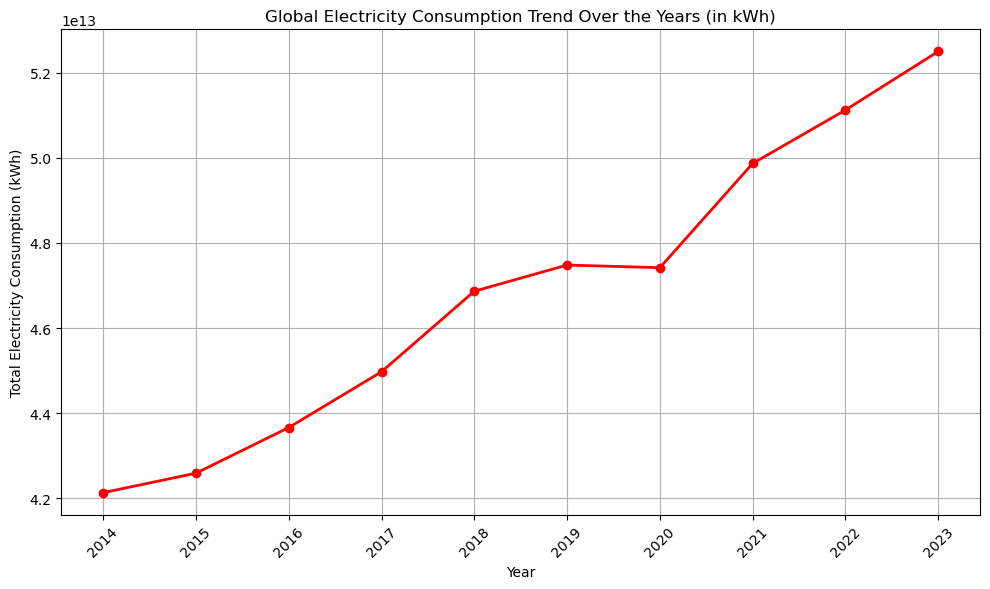

In [16]:
# numeric columns related to energy consumption for visualization

energy_consumption_columns = [col for col in energy_consumption_kwh.columns if col.startswith("energy_consumption_kwh_")]

years = [col.split('_')[-1] for col in energy_consumption_columns]

energy = energy_consumption_kwh[energy_consumption_columns].sum()

#  energy consumption trend over the years

plt.figure(figsize=(10, 6))
plt.plot(years, energy, marker='o', linestyle='-', color = 'red' ,linewidth=2)
plt.title("Global Electricity Consumption Trend Over the Years (in kWh)")
plt.xlabel("Year")
plt.ylabel("Total Electricity Consumption (kWh)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Obtaining $  per Energy Consumption. 

In [19]:
# Combining energy Consumption with energy Price by Country keeping those that appear in both using country name 
energy_consumption_kwh.shape

# keeping only countries that appear in both
energy_consuption_price = pd.merge(energy_consumption_kwh, bt_energy_prices_2014_2023, on="Country Name", how="inner")

# Countries analyzing. 
n_countries = energy_consuption_price["Country Name"].nunique()
n_countries


energy_consuption_price.head()

,Country Name,energy_consumption_kwh_2014,energy_consumption_kwh_2015,energy_consumption_kwh_2016,energy_consumption_kwh_2017,energy_consumption_kwh_2018,energy_consumption_kwh_2019,energy_consumption_kwh_2020,energy_consumption_kwh_2021,energy_consumption_kwh_2022,...,Continental region,2014,2015,2016,2017,2018,2019,2021,2022,2023
0,Belgium,8.263350e+10,8.305660e+10,8.358120e+10,8.374510e+10,8.444140e+10,8.351800e+10,8.053800e+10,8.306870e+10,7.812930e+10,...,WESTERN EUROPE,0.195,0.192,0.169,0.167,0.158,0.167,0.243609,0.524,0.4441
1,Denmark,3.168196e+10,3.204767e+10,3.224809e+10,3.258358e+10,3.221332e+10,3.261211e+10,3.226121e+10,3.481474e+10,3.350485e+10,...,WESTERN EUROPE,0.147,0.145,0.225,0.214,0.203,0.242,0.350000,0.579,0.5291
2,France,4.335326e+11,4.430282e+11,4.513150e+11,4.475050e+11,4.458387e+11,4.405567e+11,4.204749e+11,4.424444e+11,4.256846e+11,...,WESTERN EUROPE,0.142,0.143,0.145,0.136,0.130,0.136,0.173181,0.218,0.2141
3,Germany,5.248260e+11,5.283500e+11,5.305510e+11,5.313180e+11,5.218090e+11,5.075430e+11,4.928220e+11,5.101020e+11,4.893310e+11,...,WESTERN EUROPE,0.292,0.285,0.266,0.338,0.322,0.256,0.322701,0.557,0.5201
4,Italy,2.910850e+11,2.971800e+11,2.955090e+11,3.018805e+11,3.034430e+11,3.018036e+11,2.838145e+11,3.008871e+11,2.958534e+11,...,WESTERN EUROPE,0.255,0.238,0.216,0.202,0.193,0.168,0.200919,0.579,0.4611


In [20]:
#Adding price of total consuption of electricity

# new columns for consumption price by matching years and multiplying consuption with Kwh / $ cent
#Diving it by 12 for monthly price. -> Not doing this will use yearly because we switch to  using gdp instead. 
for year in years:
    consumption_col = f"energy_consumption_kwh_{year}"
    price_col = year  # Matching year column in the energy prices dataset
    new_col_name = f"consumption_price_{year}"
    if consumption_col in energy_consuption_price.columns and price_col in energy_consuption_price.columns:
        energy_consuption_price[new_col_name] = (energy_consuption_price[consumption_col] * energy_consuption_price[price_col]) #Monthly Consuption price that will be ablyzed with monthly income -> Switched back to yearly due to use of GDP instead. 

energy_consuption_price.head()

,Country Name,energy_consumption_kwh_2014,energy_consumption_kwh_2015,energy_consumption_kwh_2016,energy_consumption_kwh_2017,energy_consumption_kwh_2018,energy_consumption_kwh_2019,energy_consumption_kwh_2020,energy_consumption_kwh_2021,energy_consumption_kwh_2022,...,2023,consumption_price_2014,consumption_price_2015,consumption_price_2016,consumption_price_2017,consumption_price_2018,consumption_price_2019,consumption_price_2021,consumption_price_2022,consumption_price_2023
0,Belgium,8.263350e+10,8.305660e+10,8.358120e+10,8.374510e+10,8.444140e+10,8.351800e+10,8.053800e+10,8.306870e+10,7.812930e+10,...,0.4441,1.611353e+10,1.594687e+10,1.412522e+10,1.398543e+10,1.334174e+10,1.394751e+10,2.023628e+10,4.093975e+10,3.253851e+10
1,Denmark,3.168196e+10,3.204767e+10,3.224809e+10,3.258358e+10,3.221332e+10,3.261211e+10,3.226121e+10,3.481474e+10,3.350485e+10,...,0.5291,4.657248e+09,4.646912e+09,7.255821e+09,6.972885e+09,6.539304e+09,7.892131e+09,1.218516e+10,1.939931e+10,1.798510e+10
2,France,4.335326e+11,4.430282e+11,4.513150e+11,4.475050e+11,4.458387e+11,4.405567e+11,4.204749e+11,4.424444e+11,4.256846e+11,...,0.2141,6.156163e+10,6.335303e+10,6.544067e+10,6.086068e+10,5.795903e+10,5.991571e+10,7.662318e+10,9.279924e+10,8.794533e+10
3,Germany,5.248260e+11,5.283500e+11,5.305510e+11,5.313180e+11,5.218090e+11,5.075430e+11,4.928220e+11,5.101020e+11,4.893310e+11,...,0.5201,1.532492e+11,1.505798e+11,1.411266e+11,1.795855e+11,1.680225e+11,1.299310e+11,1.646105e+11,2.725574e+11,2.410595e+11
4,Italy,2.910850e+11,2.971800e+11,2.955090e+11,3.018805e+11,3.034430e+11,3.018036e+11,2.838145e+11,3.008871e+11,2.958534e+11,...,0.4611,7.422668e+10,7.072884e+10,6.382994e+10,6.097986e+10,5.856449e+10,5.070300e+10,6.045383e+10,1.712991e+11,1.317949e+11


In [21]:
#Cleaning it to keep monthly consumption price alone to analyze with monthly income  -> Analyzing yearly consumption to Yearly GDP Instead. 

# Retain only "Country Name", "Continental region", and columns starting with consumption_price

cols_to_keep = ["Country Name", "Continental region"] + [col for col in energy_consuption_price.columns if col.startswith("consumption_price")]
#monthly_consuption_price = energy_consuption_price[cols_to_keep]

#monthly_consuption_price.head() -> removing bc we switched to GDP 


yearly_consumption_price = energy_consuption_price[cols_to_keep]

yearly_consumption_price.head()

,Country Name,Continental region,consumption_price_2014,consumption_price_2015,consumption_price_2016,consumption_price_2017,consumption_price_2018,consumption_price_2019,consumption_price_2021,consumption_price_2022,consumption_price_2023
0,Belgium,WESTERN EUROPE,1.611353e+10,1.594687e+10,1.412522e+10,1.398543e+10,1.334174e+10,1.394751e+10,2.023628e+10,4.093975e+10,3.253851e+10
1,Denmark,WESTERN EUROPE,4.657248e+09,4.646912e+09,7.255821e+09,6.972885e+09,6.539304e+09,7.892131e+09,1.218516e+10,1.939931e+10,1.798510e+10
2,France,WESTERN EUROPE,6.156163e+10,6.335303e+10,6.544067e+10,6.086068e+10,5.795903e+10,5.991571e+10,7.662318e+10,9.279924e+10,8.794533e+10
3,Germany,WESTERN EUROPE,1.532492e+11,1.505798e+11,1.411266e+11,1.795855e+11,1.680225e+11,1.299310e+11,1.646105e+11,2.725574e+11,2.410595e+11
4,Italy,WESTERN EUROPE,7.422668e+10,7.072884e+10,6.382994e+10,6.097986e+10,5.856449e+10,5.070300e+10,6.045383e+10,1.712991e+11,1.317949e+11


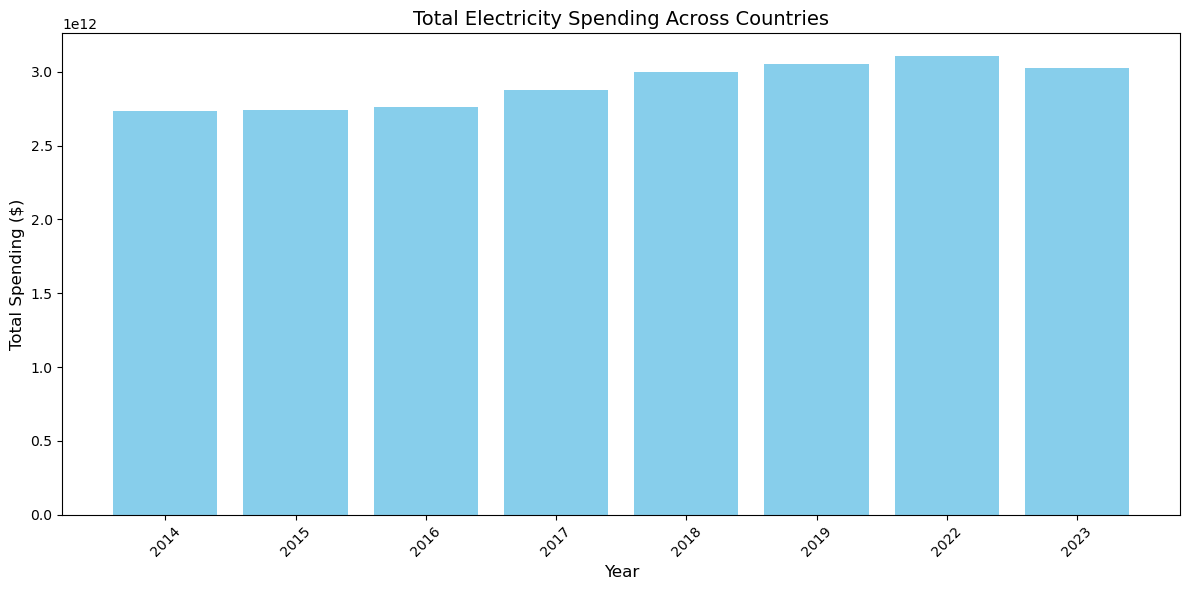

In [22]:
#Number list of countries in the dataset 

#monthly_consuption_price = monthly_consuption_price.drop(columns=["consumption_price_2021"], errors="ignore")
yearly_consumption_price = yearly_consumption_price.drop(columns = ["consumption_price_2021"], errors="ignore")


# Aggregate total spending per year for all countries
total_spending_per_year = yearly_consumption_price.iloc[:, 2:].sum()

# Extracting years and their corresponding total spend values
years = [col.split('_')[-1] for col in total_spending_per_year.index]
spending_values = total_spending_per_year.values


# Plot the total spend per year
plt.figure(figsize=(12, 6))
plt.bar(years, spending_values, color='skyblue')
plt.title("Total Electricity Spending Across Countries", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Spending ($)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [23]:
#Adding GDP of  the 39 countries. 

n_countries = yearly_consumption_price["Country Name"].unique().tolist()


yearly_consumption_price.shape
n_countries


['Belgium',
 'Denmark',
 'France',
 'Germany',
 'Italy',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Spain',
 'Sweden',
 'United Kingdom',
 'Norway',
 'Azerbaijan',
 'Kazakhstan',
 'Uzbekistan',
 'Canada',
 'United States',
 'Argentina',
 'Brazil',
 'Chile',
 'Colombia',
 'Mexico',
 'China',
 'India',
 'Indonesia',
 'Japan',
 'Malaysia',
 'Singapore',
 'Thailand',
 'Vietnam',
 'Australia',
 'New Zealand',
 'Algeria',
 'Nigeria',
 'South Africa',
 'Kuwait',
 'Saudi Arabia',
 'United Arab Emirates']

In [24]:
#path = 'Cleaned_Data/monthly_consuption_price.csv'

path = 'Cleaned_Data/yearly_consumption_price.csv'

yearly_consumption_price.to_csv(path, index=False)

Income Data Cleaning  This Analysis will not be included in final rsults. 

In [25]:
"""#Assigning the right dollar amount depending on low or high income 
income_data = pd.read_csv('Cleaned_Data/clean_household_income.csv')

income_data.tail()

#Drop 2021 & renaming cols to include income for differentiation

income_data = income_data.drop(columns=["2021"], errors="ignore")
income_data.rename(columns=lambda col: f"income_{col}" if col.isdigit() else col, inplace=True)

#Joining with Energy Prices Data by the countries 
energy_income = pd.merge(income_data, monthly_consuption_price, on="Country Name", how="inner")

#Create % of Income Goes to Electricty
energy_income.head() """  #Code Removed -> Using GDP 

'#Assigning the right dollar amount depending on low or high income \nincome_data = pd.read_csv(\'Cleaned_Data/clean_household_income.csv\')\n\nincome_data.tail()\n\n#Drop 2021 & renaming cols to include income for differentiation\n\nincome_data = income_data.drop(columns=["2021"], errors="ignore")\nincome_data.rename(columns=lambda col: f"income_{col}" if col.isdigit() else col, inplace=True)\n\n#Joining with Energy Prices Data by the countries \nenergy_income = pd.merge(income_data, monthly_consuption_price, on="Country Name", how="inner")\n\n#Create % of Income Goes to Electricty\nenergy_income.head() '

In [26]:
"""#Visual of country income per grouped income 
#Converting the income into approximations  income for analysis 
# Low = 1,000, Lower Middle = 3,000, Upper Middle = 8,000, High = 13,000
income_value_mapping = {
    "1,046-4,125": 3000,
    "1,026-4,035": 3000,
    "1,006-3,955": 3000,
    "996-3,895": 3000,
    "1,026-3,995": 3000,
    "1,036 - 4,045": 3000,
    "1,046 - 4,095": 3000,
    "1,086 - 4,255": 3000,
    "1,136 - 4,465": 3000,
    "4,046-12,735": 8000,
    "4,036-12,475": 8000,
    "3,956-12,235": 8000,
    "3,896-12,055": 8000,
    "3,996-12,375": 8000,
    "4,046 - 12,535": 8000,
    "4,096 - 12,695": 8000,
    "4,256 - 13,205": 8000,
    "4,466 - 13,845": 8000,
    "> 12,735": 13000,
    "> 12,475": 13000,
    "> 12,235": 13000,
    "> 12,055": 13000,
    "> 12,375": 13000,
    "> 13,205": 13000,
    "> 13,845": 13000,
    "1,000-4,125": 3000,
    "1,026 - 4,095": 3000,
    "4,256-13,205": 8000
}


numeric_energy_income = energy_income.replace(income_value_mapping)
numeric_energy_income.head()"""

'#Visual of country income per grouped income \n#Converting the income into approximations  income for analysis \n# Low = 1,000, Lower Middle = 3,000, Upper Middle = 8,000, High = 13,000\nincome_value_mapping = {\n    "1,046-4,125": 3000,\n    "1,026-4,035": 3000,\n    "1,006-3,955": 3000,\n    "996-3,895": 3000,\n    "1,026-3,995": 3000,\n    "1,036 - 4,045": 3000,\n    "1,046 - 4,095": 3000,\n    "1,086 - 4,255": 3000,\n    "1,136 - 4,465": 3000,\n    "4,046-12,735": 8000,\n    "4,036-12,475": 8000,\n    "3,956-12,235": 8000,\n    "3,896-12,055": 8000,\n    "3,996-12,375": 8000,\n    "4,046 - 12,535": 8000,\n    "4,096 - 12,695": 8000,\n    "4,256 - 13,205": 8000,\n    "4,466 - 13,845": 8000,\n    "> 12,735": 13000,\n    "> 12,475": 13000,\n    "> 12,235": 13000,\n    "> 12,055": 13000,\n    "> 12,375": 13000,\n    "> 13,205": 13000,\n    "> 13,845": 13000,\n    "1,000-4,125": 3000,\n    "1,026 - 4,095": 3000,\n    "4,256-13,205": 8000\n}\n\n\nnumeric_energy_income = energy_income.re

In [27]:
"""#Creating an avg income using the income columns alone 
#income_columns = [col for col in numeric_energy_income.columns if col.startswith("income_")]
#average_income_trend = numeric_energy_income[income_columns].mean()

#average_income_trend #Why are the constant? 

#2nd attempt at avgs. Cols (2- 9)

income_columns2 = numeric_energy_income.columns[1:9] 
average_income_trend2 = numeric_energy_income[income_columns2].mean()

# Display the updated results
#average_income_trend
average_income_trend2 #Same ocnstant value. 
""" #Gave me inconsintencies and showed no difference in monthly income in different years. 

'#Creating an avg income using the income columns alone \n#income_columns = [col for col in numeric_energy_income.columns if col.startswith("income_")]\n#average_income_trend = numeric_energy_income[income_columns].mean()\n\n#average_income_trend #Why are the constant? \n\n#2nd attempt at avgs. Cols (2- 9)\n\nincome_columns2 = numeric_energy_income.columns[1:9] \naverage_income_trend2 = numeric_energy_income[income_columns2].mean()\n\n# Display the updated results\n#average_income_trend\naverage_income_trend2 #Same ocnstant value. \n'

Switching to Consider GDP Prices Instead of Montly Income


In [28]:
yearly_consumption_price = pd.read_csv('Cleaned_Data/yearly_consumption_price.csv')
yearly_gdp = pd.read_csv('Raw_Data/Income_Price/WITS_Country_Timeseries.csv') 


yearly_gdp.head()

#Combining GDP with the yearly consumption of  energy 

energy_consumtion_gdp = pd.merge(yearly_gdp, yearly_consumption_price, on='Country Name', how='inner')

print(energy_consumtion_gdp.shape)
energy_consumtion_gdp.head()


(39, 20)


,Country Name,Indicator Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,Continental region,consumption_price_2014,consumption_price_2015,consumption_price_2016,consumption_price_2017,consumption_price_2018,consumption_price_2019,consumption_price_2022,consumption_price_2023
0,Algeria,GDP (current US$),2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717600e+11,1.457440e+11,1.634720e+11,1.919130e+11,NORTHERN AFRICA,1.255473e+09,1.376595e+09,1.593000e+09,1.490684e+09,1.297274e+09,1.329216e+09,2.665089e+09,2.824751e+09
1,Argentina,GDP (current US$),5.263200e+11,5.947490e+11,5.575320e+11,6.436280e+11,5.248200e+11,4.477550e+11,3.855400e+11,4.872270e+11,6.327700e+11,SOUTH AMERICA,1.186684e+10,9.038540e+09,1.133273e+10,1.367411e+10,1.995532e+10,1.356685e+10,3.981216e+09,4.191436e+09
2,Australia,GDP (current US$),1.467590e+12,1.350580e+12,1.206560e+12,1.326470e+12,1.428270e+12,1.392220e+12,1.326940e+12,1.552700e+12,1.675420e+12,OCEANIA,4.955662e+10,4.863300e+10,4.467371e+10,3.987607e+10,5.441284e+10,4.874569e+10,5.797219e+10,5.274669e+10
3,Azerbaijan,GDP (current US$),7.523974e+10,5.307624e+10,3.786701e+10,4.086663e+10,4.711248e+10,4.817424e+10,4.269300e+10,5.482541e+10,7.872106e+10,CIS (FORMER USSR),1.513464e+09,1.563563e+09,1.218958e+09,1.219213e+09,1.123427e+09,1.039147e+09,1.089051e+09,1.091636e+09
4,Belgium,GDP (current US$),5.353900e+11,4.623360e+11,4.760630e+11,5.027650e+11,5.432990e+11,5.358660e+11,5.252130e+11,5.943520e+11,5.786040e+11,WESTERN EUROPE,1.611353e+10,1.594687e+10,1.412522e+10,1.398543e+10,1.334174e+10,1.394751e+10,4.093975e+10,3.253851e+10


In [29]:
#Cleaning the combined data 

#Dropping the 2nd col and move continental region as second col 

energy_consumtion_gdp = energy_consumtion_gdp.drop(columns=['Indicator Name'])

cols = list(energy_consumtion_gdp.columns)
cols.remove('Continental region')
cols.insert(1, 'Continental region')
energy_consumtion_gdp = energy_consumtion_gdp[cols]

energy_consumtion_gdp.head()

,Country Name,Continental region,2014,2015,2016,2017,2018,2019,2020,2021,2022,consumption_price_2014,consumption_price_2015,consumption_price_2016,consumption_price_2017,consumption_price_2018,consumption_price_2019,consumption_price_2022,consumption_price_2023
0,Algeria,NORTHERN AFRICA,2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717600e+11,1.457440e+11,1.634720e+11,1.919130e+11,1.255473e+09,1.376595e+09,1.593000e+09,1.490684e+09,1.297274e+09,1.329216e+09,2.665089e+09,2.824751e+09
1,Argentina,SOUTH AMERICA,5.263200e+11,5.947490e+11,5.575320e+11,6.436280e+11,5.248200e+11,4.477550e+11,3.855400e+11,4.872270e+11,6.327700e+11,1.186684e+10,9.038540e+09,1.133273e+10,1.367411e+10,1.995532e+10,1.356685e+10,3.981216e+09,4.191436e+09
2,Australia,OCEANIA,1.467590e+12,1.350580e+12,1.206560e+12,1.326470e+12,1.428270e+12,1.392220e+12,1.326940e+12,1.552700e+12,1.675420e+12,4.955662e+10,4.863300e+10,4.467371e+10,3.987607e+10,5.441284e+10,4.874569e+10,5.797219e+10,5.274669e+10
3,Azerbaijan,CIS (FORMER USSR),7.523974e+10,5.307624e+10,3.786701e+10,4.086663e+10,4.711248e+10,4.817424e+10,4.269300e+10,5.482541e+10,7.872106e+10,1.513464e+09,1.563563e+09,1.218958e+09,1.219213e+09,1.123427e+09,1.039147e+09,1.089051e+09,1.091636e+09
4,Belgium,WESTERN EUROPE,5.353900e+11,4.623360e+11,4.760630e+11,5.027650e+11,5.432990e+11,5.358660e+11,5.252130e+11,5.943520e+11,5.786040e+11,1.611353e+10,1.594687e+10,1.412522e+10,1.398543e+10,1.334174e+10,1.394751e+10,4.093975e+10,3.253851e+10


In [30]:
#creating a new % of gdp -> electriciy 

#Dropping the 2020 & 2021 cols of gdp to keep consistent  since the yearly consuption price also did not have them. 

energy_consumtion_gdp = energy_consumtion_gdp.drop(columns=['2020'])
energy_consumtion_gdp = energy_consumtion_gdp.drop(columns=['2021'])

energy_consumtion_gdp.head()



,Country Name,Continental region,2014,2015,2016,2017,2018,2019,2022,consumption_price_2014,consumption_price_2015,consumption_price_2016,consumption_price_2017,consumption_price_2018,consumption_price_2019,consumption_price_2022,consumption_price_2023
0,Algeria,NORTHERN AFRICA,2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717600e+11,1.919130e+11,1.255473e+09,1.376595e+09,1.593000e+09,1.490684e+09,1.297274e+09,1.329216e+09,2.665089e+09,2.824751e+09
1,Argentina,SOUTH AMERICA,5.263200e+11,5.947490e+11,5.575320e+11,6.436280e+11,5.248200e+11,4.477550e+11,6.327700e+11,1.186684e+10,9.038540e+09,1.133273e+10,1.367411e+10,1.995532e+10,1.356685e+10,3.981216e+09,4.191436e+09
2,Australia,OCEANIA,1.467590e+12,1.350580e+12,1.206560e+12,1.326470e+12,1.428270e+12,1.392220e+12,1.675420e+12,4.955662e+10,4.863300e+10,4.467371e+10,3.987607e+10,5.441284e+10,4.874569e+10,5.797219e+10,5.274669e+10
3,Azerbaijan,CIS (FORMER USSR),7.523974e+10,5.307624e+10,3.786701e+10,4.086663e+10,4.711248e+10,4.817424e+10,7.872106e+10,1.513464e+09,1.563563e+09,1.218958e+09,1.219213e+09,1.123427e+09,1.039147e+09,1.089051e+09,1.091636e+09
4,Belgium,WESTERN EUROPE,5.353900e+11,4.623360e+11,4.760630e+11,5.027650e+11,5.432990e+11,5.358660e+11,5.786040e+11,1.611353e+10,1.594687e+10,1.412522e+10,1.398543e+10,1.334174e+10,1.394751e+10,4.093975e+10,3.253851e+10


In [31]:
#Dropping the 2023 

energy_consumtion_gdp = energy_consumtion_gdp.drop(columns=['consumption_price_2023'])


energy_consumtion_gdp.head()


,Country Name,Continental region,2014,2015,2016,2017,2018,2019,2022,consumption_price_2014,consumption_price_2015,consumption_price_2016,consumption_price_2017,consumption_price_2018,consumption_price_2019,consumption_price_2022
0,Algeria,NORTHERN AFRICA,2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717600e+11,1.919130e+11,1.255473e+09,1.376595e+09,1.593000e+09,1.490684e+09,1.297274e+09,1.329216e+09,2.665089e+09
1,Argentina,SOUTH AMERICA,5.263200e+11,5.947490e+11,5.575320e+11,6.436280e+11,5.248200e+11,4.477550e+11,6.327700e+11,1.186684e+10,9.038540e+09,1.133273e+10,1.367411e+10,1.995532e+10,1.356685e+10,3.981216e+09
2,Australia,OCEANIA,1.467590e+12,1.350580e+12,1.206560e+12,1.326470e+12,1.428270e+12,1.392220e+12,1.675420e+12,4.955662e+10,4.863300e+10,4.467371e+10,3.987607e+10,5.441284e+10,4.874569e+10,5.797219e+10
3,Azerbaijan,CIS (FORMER USSR),7.523974e+10,5.307624e+10,3.786701e+10,4.086663e+10,4.711248e+10,4.817424e+10,7.872106e+10,1.513464e+09,1.563563e+09,1.218958e+09,1.219213e+09,1.123427e+09,1.039147e+09,1.089051e+09
4,Belgium,WESTERN EUROPE,5.353900e+11,4.623360e+11,4.760630e+11,5.027650e+11,5.432990e+11,5.358660e+11,5.786040e+11,1.611353e+10,1.594687e+10,1.412522e+10,1.398543e+10,1.334174e+10,1.394751e+10,4.093975e+10


In [32]:
#Renaming the 2014 - 2022 to add GDP to it

 
gdp_columns = [col for col in ["2014", "2015", "2016", "2017", "2018", "2019", "2022"] if col in energy_consumtion_gdp.columns]
energy_consumtion_gdp.rename(columns={col: f"gdp_{col}" for col in gdp_columns}, inplace=True)


path = 'Cleaned_Data/energy_consumtion_gdp.csv'
energy_consumtion_gdp.to_csv(path, index=False)



Creating a energy poverty index per % of how much the enrgy price is compared to the GDP. 

In [33]:

energy_consumtion_gdp = pd.read_csv('Cleaned_Data/energy_consumtion_gdp.csv')
energy_consumtion_gdp.head()


,Country Name,Continental region,gdp_2014,gdp_2015,gdp_2016,gdp_2017,gdp_2018,gdp_2019,gdp_2022,consumption_price_2014,consumption_price_2015,consumption_price_2016,consumption_price_2017,consumption_price_2018,consumption_price_2019,consumption_price_2022
0,Algeria,NORTHERN AFRICA,2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717600e+11,1.919130e+11,1.255473e+09,1.376595e+09,1.593000e+09,1.490684e+09,1.297274e+09,1.329216e+09,2.665089e+09
1,Argentina,SOUTH AMERICA,5.263200e+11,5.947490e+11,5.575320e+11,6.436280e+11,5.248200e+11,4.477550e+11,6.327700e+11,1.186684e+10,9.038540e+09,1.133273e+10,1.367411e+10,1.995532e+10,1.356685e+10,3.981216e+09
2,Australia,OCEANIA,1.467590e+12,1.350580e+12,1.206560e+12,1.326470e+12,1.428270e+12,1.392220e+12,1.675420e+12,4.955662e+10,4.863300e+10,4.467371e+10,3.987607e+10,5.441284e+10,4.874569e+10,5.797219e+10
3,Azerbaijan,CIS (FORMER USSR),7.523974e+10,5.307624e+10,3.786701e+10,4.086663e+10,4.711248e+10,4.817424e+10,7.872106e+10,1.513464e+09,1.563563e+09,1.218958e+09,1.219213e+09,1.123427e+09,1.039147e+09,1.089051e+09
4,Belgium,WESTERN EUROPE,5.353900e+11,4.623360e+11,4.760630e+11,5.027650e+11,5.432990e+11,5.358660e+11,5.786040e+11,1.611353e+10,1.594687e+10,1.412522e+10,1.398543e+10,1.334174e+10,1.394751e+10,4.093975e+10


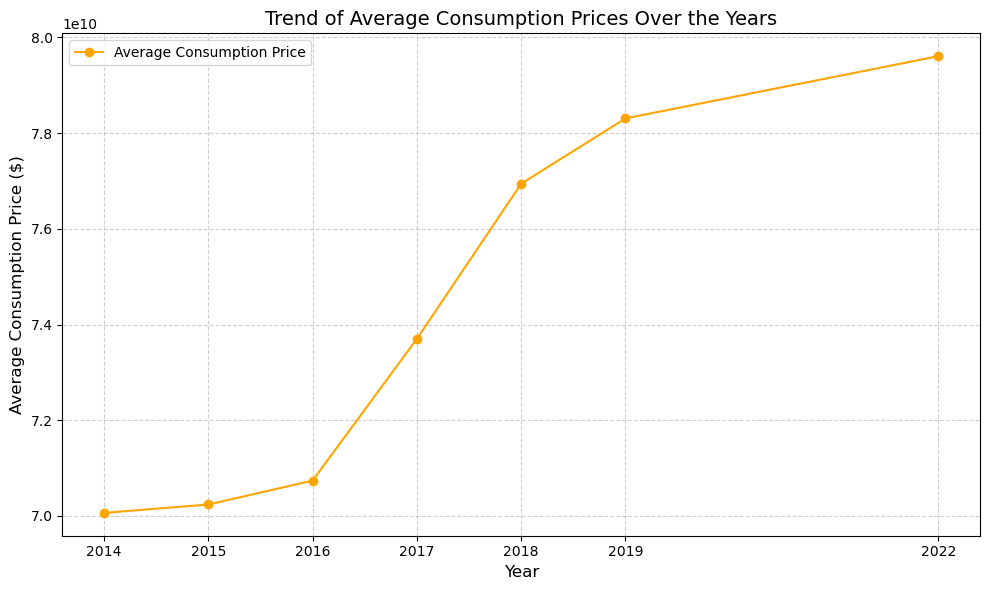

In [34]:
#Rechecking the trend of consumption price 

years = [2014, 2015, 2016, 2017, 2018, 2019, 2022]
consumption_columns = [f"consumption_price_{year}" for year in years]

avg_consumption_prices= energy_consumtion_gdp[consumption_columns].mean()

plt.figure(figsize=(10, 6))
plt.plot(years, avg_consumption_prices, marker='o', label="Average Consumption Price", color = 'orange')
plt.title("Trend of Average Consumption Prices Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Consumption Price ($)", fontsize=12)
plt.xticks(years)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

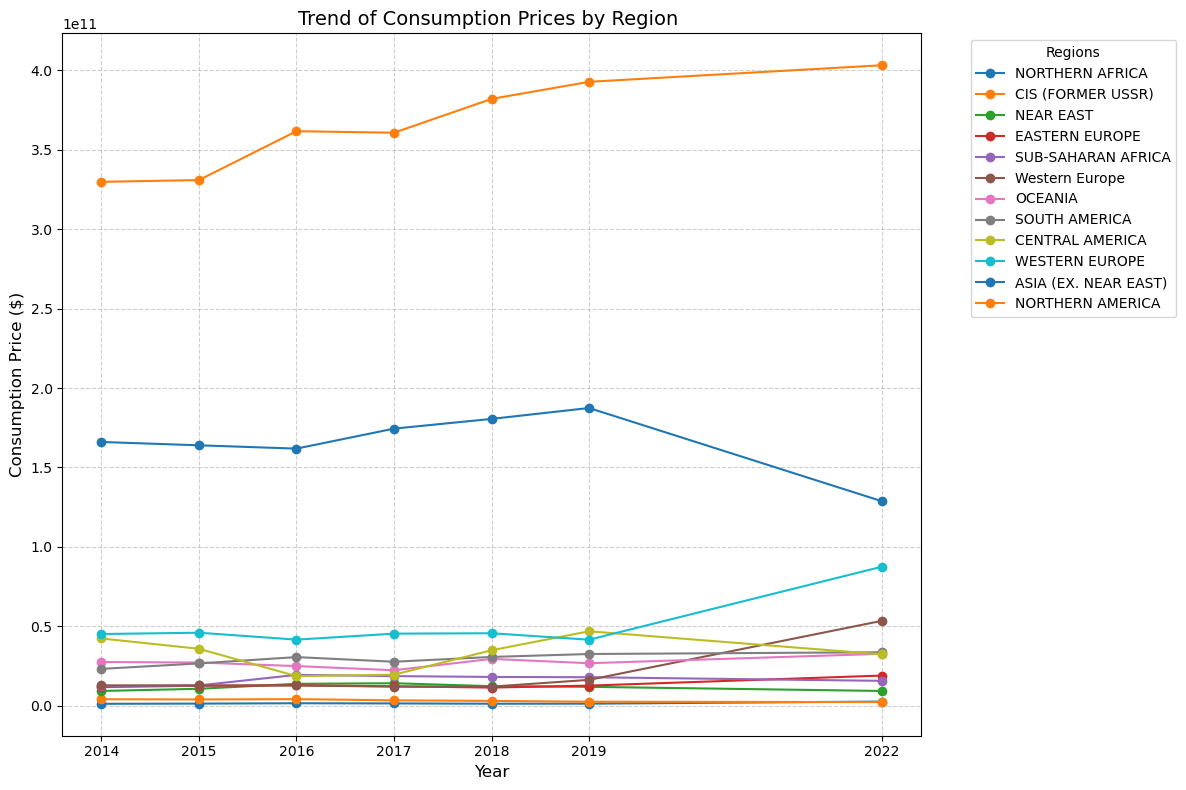

In [35]:
# Trend per Regions. 

regions = energy_consumtion_gdp['Continental region'].unique()
region_trends = {}

for region in regions:
    region_data = energy_consumtion_gdp[energy_consumtion_gdp['Continental region'] == region]
    region_trends[region] = region_data[consumption_columns].mean().values

# Sorting the regions by total avg consumption price across  years
sorted_regions = sorted(region_trends.keys(), key=lambda x: sum(region_trends[x]))

sorted_region_trends = {region: region_trends[region] for region in sorted_regions}

plt.figure(figsize=(12, 8))
for region, prices in sorted_region_trends.items():
    plt.plot(years, prices, marker='o', label=region)

plt.title("Trend of Consumption Prices by Region ", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Consumption Price ($)", fontsize=12)
plt.xticks(years)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
# Creating the index which is a % of GDP that goes towards energy 

#  new columns for the poverty index for each year
for year in years:
    gdp_column = f"gdp_{year}"
    consumption_column = f"consumption_price_{year}"
    poverty_index_column = f"poverty_index_{year}"
    
    #  the poverty index as the percentage of GDP spent on energy
    energy_consumtion_gdp[poverty_index_column] = (energy_consumtion_gdp[consumption_column] / energy_consumtion_gdp[gdp_column]) * 100





,Country Name,Continental region,gdp_2014,gdp_2015,gdp_2016,gdp_2017,gdp_2018,gdp_2019,gdp_2022,consumption_price_2014,...,consumption_price_2018,consumption_price_2019,consumption_price_2022,poverty_index_2014,poverty_index_2015,poverty_index_2016,poverty_index_2017,poverty_index_2018,poverty_index_2019,poverty_index_2022
34,United Arab Emirates,NEAR EAST,4.141050e+11,3.702750e+11,3.692550e+11,3.905170e+11,4.270490e+11,4.179900e+11,5.075350e+11,1.031324e+10,...,1.280284e+10,1.307354e+10,1.063386e+10,2.490489,3.442525,3.655662,3.605910,2.997980,3.127715,2.095196
35,United Kingdom,WESTERN EUROPE,3.065220e+12,2.934860e+12,2.699660e+12,2.683490e+12,2.878150e+12,2.857060e+12,3.070670e+12,4.644555e+10,...,5.267028e+10,5.354285e+10,1.170159e+11,1.515244,1.644249,1.776656,1.830487,1.830005,1.874054,3.810762
36,United States,NORTHERN AMERICA,1.755070e+13,1.820600e+13,1.869510e+13,1.947730e+13,2.053310e+13,2.138100e+13,2.546270e+13,5.920728e+11,...,6.913256e+11,7.175696e+11,7.389970e+11,3.373500,3.273596,3.440526,3.312752,3.366884,3.356108,2.902273
37,Uzbekistan,CIS (FORMER USSR),8.084539e+10,8.619626e+10,8.613829e+10,6.208132e+10,5.287011e+10,6.028350e+10,8.039185e+10,3.265504e+09,...,3.346527e+09,3.091026e+09,1.648284e+09,4.039197,3.742423,3.995361,6.061565,6.329715,5.127482,2.050312
38,Vietnam,ASIA (EX. NEAR EAST),2.334510e+11,2.392580e+11,2.570960e+11,2.813540e+11,3.101060e+11,3.343650e+11,4.088020e+11,1.543524e+10,...,2.370222e+10,2.588111e+10,1.925585e+10,6.611769,6.966216,7.209663,7.449107,7.643265,7.740377,4.710313


In [59]:
#saving this data. 

path = 'Cleaned_Data/gdp_energy_price_poverty_index.csv'

energy_consumtion_gdp.to_csv(path, index=False)

gdp_energy_price_poverty_index = pd.read_csv(path)


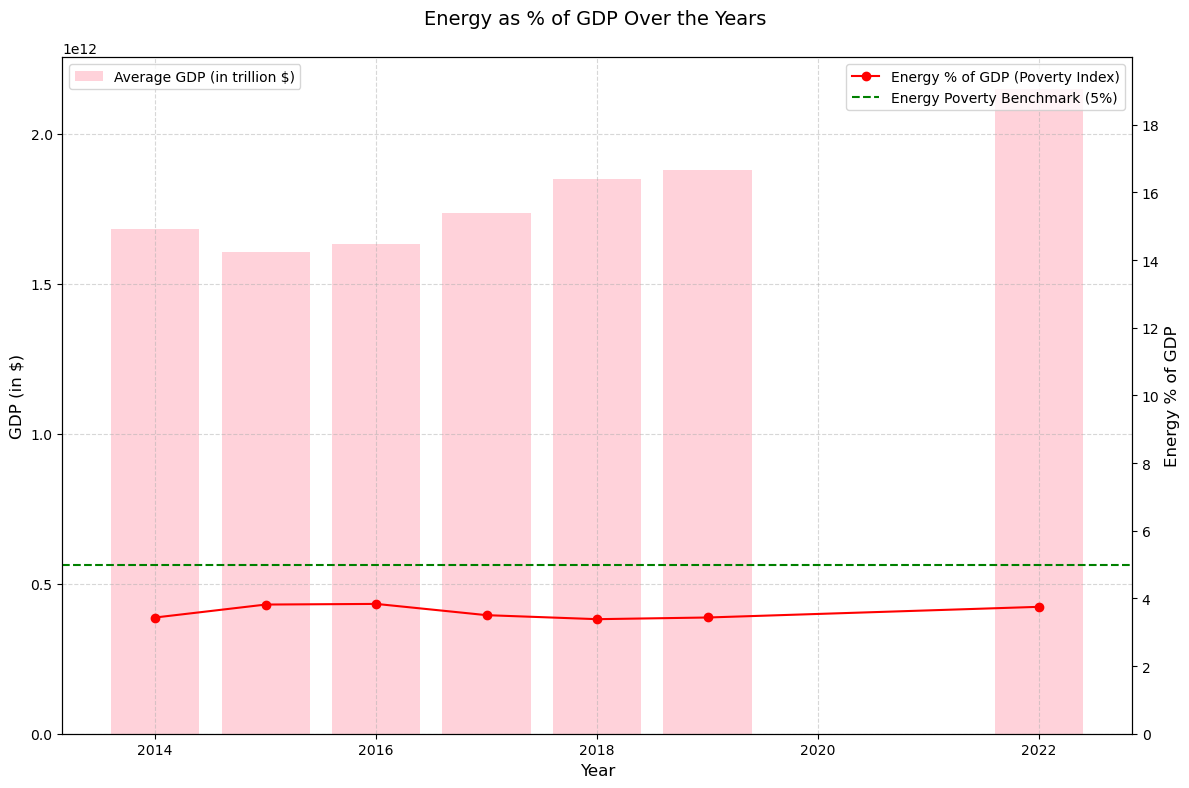

In [61]:
#Visual of gdp & the % that goes towards energy per Year. 



avg_gdp = gdp_energy_price_poverty_index[[f"gdp_{year}" for year in years]].mean()
avg_poverty_index = gdp_energy_price_poverty_index[[f"poverty_index_{year}" for year in years]].mean()
avg_consumption = gdp_energy_price_poverty_index[[f"consumption_price_{year}" for year in years]].mean()



# benchmark line at 5% visualization
fig, ax1 = plt.subplots(figsize=(12, 8))

#  Y-axis for GDP
ax1.bar(years, avg_gdp, alpha=0.7, label="Average GDP (in trillion $)", color='pink')
ax1.set_ylabel("GDP (in $)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.legend(loc="upper left")
ax1.grid(alpha=0.5, linestyle='--')

#  Y-axis for poverty index 
ax2 = ax1.twinx()
ax2.plot(years, avg_poverty_index, marker='o', color='red', label="Energy % of GDP (Poverty Index)")
ax2.axhline(y=5, color='green', linestyle='--', linewidth=1.5, label="Energy Poverty Benchmark (5%)")  # benchmark line of 5% 
ax2.set_ylabel("Energy % of GDP", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(1, 20) 
ax2.set_yticks(range(0, 20, 2))  #increment of 2%
ax2.legend(loc="upper right")

fig.suptitle("Energy as % of GDP Over the Years", fontsize=14)
fig.tight_layout()
plt.show()




Energy Poverty Index: This represents the percentage of GDP that goes toward energy consumption for every country.

5%Threshold: There is 10% rule that suggests households should spend no more than 10% of their income on energy, exceeding this threshold could hinder their ability to afford other necessities, placing them in energy poverty (Lu, 2023). Applying this principle to GDP, a 5% threshold was established as the benchmark for energy poverty. This is based on household income typically representing 50-70% of GDP, with 10% of that being 5-7%. The lower end (5%) was chosen to account for developing countries. In this dataset, countries / regions spending more than 5% of their GDP on energy are classified as energy poverty regions.

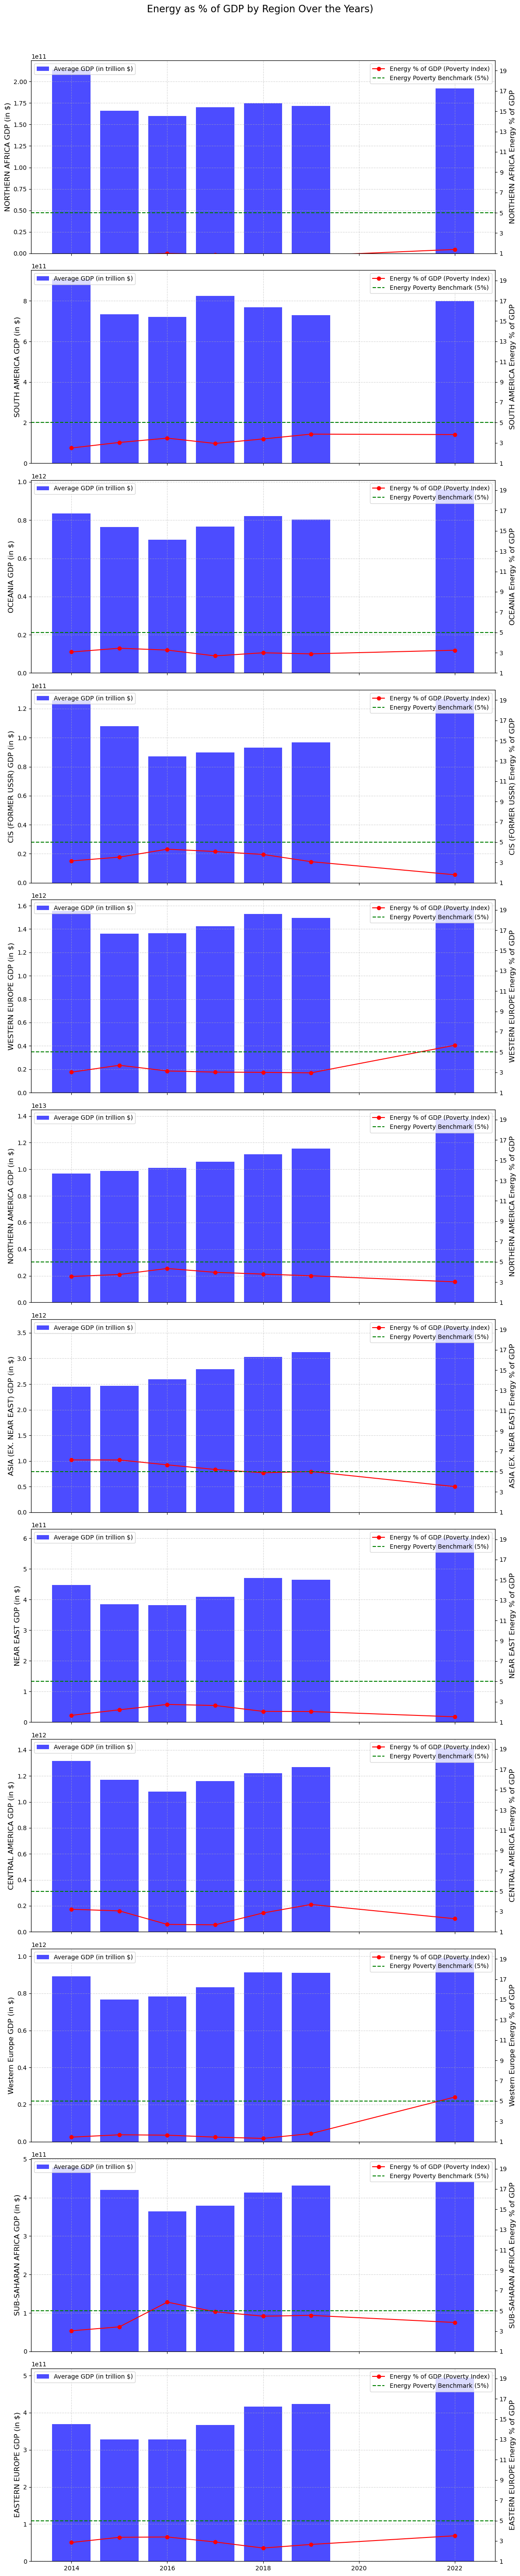

In [64]:
#Visual of Energy Poverty per Region to see the ones that did surpass the threshold. 
#  the regional averages for GDP and poverty index per year
regions = gdp_energy_price_poverty_index['Continental region'].unique()

regional_gdp = {}
regional_poverty_index = {}

for region in regions:
    region_data = gdp_energy_price_poverty_index[gdp_energy_price_poverty_index['Continental region'] == region]
    regional_gdp[region] = region_data[[f"gdp_{year}" for year in years]].mean()
    regional_poverty_index[region] = region_data[[f"poverty_index_{year}" for year in years]].mean()

#  regional data
fig, ax = plt.subplots(len(regions), 1, figsize=(12, len(regions) * 5), sharex=True)

for i, region in enumerate(regions):
    # subplots for each region
    ax1 = ax[i]
    ax1.bar(years, regional_gdp[region], alpha=0.7, color='blue', label="Average GDP (in trillion $)")
    ax1.set_ylabel(f"{region} GDP (in $)", fontsize=12)
    ax1.legend(loc="upper left")
    ax1.grid(alpha=0.5, linestyle='--')

    # re-stating the  for poverty index as before
    ax2 = ax1.twinx()
    ax2.plot(years, regional_poverty_index[region], marker='o', color='red', label="Energy % of GDP (Poverty Index)")
    ax2.axhline(y=5, color='green', linestyle='--', linewidth=1.5, label="Energy Poverty Benchmark (5%)")
    ax2.set_ylabel(f"{region} Energy % of GDP", fontsize=12, color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.set_ylim(2, 20)  
    ax2.set_yticks(range(1, 21, 2))
    ax2.legend(loc="upper right")

fig.suptitle("Energy as % of GDP by Region Over the Years)", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



Cleaning Weather Data and Seeing if there Correlation Between the energy poverty and weather anomalies. 

In [68]:
#Past Weather data and finding correlation among energy prices. 

past_weather_data = [
    ('Raw_Data/Weather_Data/Africa.csv', 'Africa'),
    ('Raw_Data/Weather_Data/Asia.csv', 'Asia'),
    ('Raw_Data/Weather_Data/Atlantic_MDR.csv', 'Atlantic MDR'),
    ('Raw_Data/Weather_Data/Carribean.csv', 'Caribbean'),
    ('Raw_Data/Weather_Data/East_Pacifc.csv', 'East Pacific'),
    ('Raw_Data/Weather_Data/Europe.csv', 'Europe'),
    ('Raw_Data/Weather_Data/North_America.csv', 'North America'),
    ('Raw_Data/Weather_Data/Northern_Hemisphere.csv', 'Northern Hemisphere'),
    ('Raw_Data/Weather_Data/Oceania.csv', 'Oceania'),
    ('Raw_Data/Weather_Data/South_America.csv', 'South America')
]

# Cleaning all the files  the data and change the cols 
def clean_data(file_path, region, start_row=4):
    try:

        df = pd.read_csv(file_path, skiprows=start_row, header=None)
        # renaming the cols based on year and anomaly
        df.columns = ["Year", "Anomaly"]
        # adding the continental Region column so we can join wih energy prices later. 
        df["Continental Region"] = region
        return df
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None



In [69]:

# processing all files using the function
cleaned_files = []
for file_path, region in past_weather_data:
    cleaned_df = clean_data(file_path, region)
    if cleaned_df is not None:
        cleaned_files.append(cleaned_df)

# combining all files in a df
combined_weather_data = pd.concat(cleaned_files, ignore_index=True)

# restructuring the and dropping anomaly col so that every year is a col like the energy price dataset. 
cleaned_weather_data_past = combined_weather_data.pivot(
    index="Continental Region", columns="Year", values="Anomaly"
).reset_index()
cleaned_weather_data_past

Year,Continental Region,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Year
0,Africa,0.55,0.56,0.67,0.72,0.65,0.66,0.72,0.63,0.57,0.59,Anomaly
1,Asia,0.55,0.56,0.67,0.72,0.65,0.66,0.72,0.63,0.57,0.59,Anomaly
2,Atlantic MDR,0.52,0.50,0.83,0.83,0.61,0.40,0.79,0.74,0.68,0.81,Anomaly
3,Caribbean,0.62,0.65,0.92,0.91,0.77,0.55,0.93,0.83,0.74,0.70,Anomaly
4,East Pacific,0.61,1.19,1.42,0.84,0.85,0.82,0.76,0.59,0.56,0.40,Anomaly
5,Europe,1.10,1.75,1.55,1.40,1.54,1.68,1.96,1.94,1.29,1.98,Anomaly
6,North America,0.50,1.03,1.89,1.68,1.19,0.86,1.15,1.41,1.18,1.42,Anomaly
7,Northern Hemisphere,0.82,0.97,1.22,1.32,1.19,1.09,1.28,1.34,1.17,1.20,Anomaly
8,Oceania,1.10,0.91,1.32,0.78,1.12,1.06,1.03,0.83,1.00,0.53,Anomaly
9,South America,0.78,1.22,1.44,1.18,1.11,1.16,1.29,1.13,1.01,1.19,Anomaly


In [70]:
#Further clean dropping first and last col of year anomaly data and save

cleaned_weather_data_past = cleaned_weather_data_past.iloc[:, -13:-1]
#Dropping the 2020, 2021 amd 2023 
col = ["2020", "2021", "2023"]
cleaned_weather_data_past = cleaned_weather_data_past.drop(columns=col, errors='ignore')


path = 'Cleaned_Data/cleaned_weather_data_past.csv'
cleaned_weather_data_past.to_csv(path, index=False)

In [71]:
cleaned_weather_data_past.head()

#Dropping the 2020, 2021 amd 2023 



Year,Continental Region,2014,2015,2016,2017,2018,2019,2022
0,Africa,0.55,0.56,0.67,0.72,0.65,0.66,0.57
1,Asia,0.55,0.56,0.67,0.72,0.65,0.66,0.57
2,Atlantic MDR,0.52,0.50,0.83,0.83,0.61,0.40,0.68
3,Caribbean,0.62,0.65,0.92,0.91,0.77,0.55,0.74
4,East Pacific,0.61,1.19,1.42,0.84,0.85,0.82,0.56


Combining the past weather anomalies  and energy poverty index & renaming according to the regions in past weather regions.

In [78]:
#adding weather to weather cols 
cleaned_weather_data_past.rename(columns=lambda col: f"weather_{col}" if col.isdigit() else col, inplace=True)

cleaned_weather_data_past.head()
# Renaming regional cols of poverty index so they match that of per past weather region. This will also be done for the future weather prdictions. #10 regions. 
cleaned_weather_data_past.shape

gdp_energy_price_poverty_index.shape #39 countries should stay the same after merge. -> 2 countries were dropped. 

(39, 23)

In [79]:
# region mapping to align better with weather regions
refined_region_mapping = {
    'NORTHERN AFRICA': 'Africa',
    'SOUTH AMERICA': 'South America',
    'OCEANIA': 'Oceania',
    'CIS (FORMER USSR)': 'Asia',
    'WESTERN EUROPE': 'Europe',
    'NORTHERN AMERICA': 'North America',
    'ASIA (EX. NEAR EAST)': 'Asia',
    'NEAR EAST': 'Asia',
    'CENTRAL AMERICA': 'Central America',
    'SUB-SAHARAN AFRICA': 'Africa',
    'EASTERN EUROPE': 'Europe'
}

gdp_energy_price_poverty_index['Mapped Region'] = gdp_energy_price_poverty_index['Continental region'].map(refined_region_mapping)

# merging both datasets. 
energy_index_past_weather = pd.merge(
    cleaned_weather_data_past, 
    gdp_energy_price_poverty_index, 
    left_on='Continental Region', 
    right_on='Mapped Region', 
    how='inner'
)

print(energy_index_past_weather.head()) 
print(energy_index_past_weather.shape)

  Continental Region weather_2014 weather_2015 weather_2016 weather_2017  \
0             Africa         0.55         0.56         0.67         0.72   
1             Africa         0.55         0.56         0.67         0.72   
2             Africa         0.55         0.56         0.67         0.72   
3               Asia         0.55         0.56         0.67         0.72   
4               Asia         0.55         0.56         0.67         0.72   

  weather_2018 weather_2019 weather_2022  Country Name    Continental region  \
0         0.65         0.66         0.57       Algeria       NORTHERN AFRICA   
1         0.65         0.66         0.57       Nigeria    SUB-SAHARAN AFRICA   
2         0.65         0.66         0.57  South Africa    SUB-SAHARAN AFRICA   
3         0.65         0.66         0.57    Azerbaijan     CIS (FORMER USSR)   
4         0.65         0.66         0.57         China  ASIA (EX. NEAR EAST)   

   ...  consumption_price_2019  consumption_price_2022  povert

In [81]:
#Dropping the Index Regions
energy_index_past_weather.drop(columns=['Continental region'], inplace=True)
#Mapped Region 
energy_index_past_weather.drop(columns=['Mapped Region'], inplace=True)

 #Moving Country up 
columns_order = ['Continental Region', 'Country Name'] + [col for col in energy_index_past_weather.columns if col not in ['Continental Region', 'Country Name']]

#Saving the combined df 
energy_index_past_weather = energy_index_past_weather[columns_order]

path = 'Cleaned_Data/energy_index_past_weather.csv'
energy_index_past_weather.to_csv(path, index=False)





energy_index_past_weather.head()

,Continental Region,Country Name,weather_2014,weather_2015,weather_2016,weather_2017,weather_2018,weather_2019,weather_2022,gdp_2014,...,consumption_price_2018,consumption_price_2019,consumption_price_2022,poverty_index_2014,poverty_index_2015,poverty_index_2016,poverty_index_2017,poverty_index_2018,poverty_index_2019,poverty_index_2022
0,Africa,Algeria,0.55,0.56,0.67,0.72,0.65,0.66,0.57,2.138100e+11,...,1.297274e+09,1.329216e+09,2.665089e+09,0.587191,0.829379,0.995413,0.876373,0.741677,0.773880,1.388697
1,Africa,Nigeria,0.55,0.56,0.67,0.72,0.65,0.66,0.57,5.741840e+11,...,3.644589e+09,3.261033e+09,8.078539e+08,0.677614,1.314681,1.271323,1.169959,0.864181,0.687232,0.169224
2,Africa,South Africa,0.55,0.56,0.67,0.72,0.65,0.66,0.57,3.811990e+11,...,3.267085e+10,3.270208e+10,3.059550e+10,5.390580,5.525253,10.441043,8.642432,8.083663,8.416853,7.538250
3,Asia,Azerbaijan,0.55,0.56,0.67,0.72,0.65,0.66,0.57,7.523974e+10,...,1.123427e+09,1.039147e+09,1.089051e+09,2.011522,2.945881,3.219049,2.983395,2.384563,2.157060,1.383430
4,Asia,China,0.55,0.56,0.67,0.72,0.65,0.66,0.57,1.047560e+13,...,9.706443e+11,9.611643e+11,6.124248e+11,6.872319,6.631112,6.775796,7.208289,6.985615,6.730842,3.409330


In [104]:
# later Drop all cols except poverty_index and region and Year 

#Tidy the combined data make years one col and gdp one col, weather_anomalie one col, consumption_price one col and poverty index. 
# Melt the dataset to make it tidy
tidy_data = pd.melt(
    energy_index_past_weather,
    id_vars=['Continental Region', 'Country Name'],
    value_vars=[
        'weather_2014', 'weather_2015', 'weather_2016', 'weather_2017', 'weather_2018', 'weather_2019', 'weather_2022',
        'gdp_2014', 'gdp_2015', 'gdp_2016', 'gdp_2017', 'gdp_2018', 'gdp_2019', 'gdp_2022',
        'consumption_price_2014', 'consumption_price_2015', 'consumption_price_2016', 
        'consumption_price_2017', 'consumption_price_2018', 'consumption_price_2019', 'consumption_price_2022',
        'poverty_index_2014', 'poverty_index_2015', 'poverty_index_2016', 'poverty_index_2017', 
        'poverty_index_2018', 'poverty_index_2019', 'poverty_index_2022'
    ],
    var_name='Metric',
    value_name='Value'
)

tidy_data['Year'] = tidy_data['Metric'].str.extract(r'(\d{4})').astype(int)
tidy_data['Metric'] = tidy_data['Metric'].str.extract(r'([a-zA-Z_]+)')

# Pivoting it to  have one column per metric
tidy_energy_index_past_weather = tidy_data.pivot_table(
    index=['Continental Region', 'Country Name', 'Year'],
    columns='Metric',
    values='Value',
    aggfunc='first'
).reset_index()

# Renaming cols 
tidy_energy_index_past_weather.columns = ['Continental Region', 'Country Name', 'Year', 'Consumption Price', 'GDP', 'Poverty Index', 'Weather Anomaly']

#tidy_energy_index_past_weather.head() checked out 

#Save it
path = 'Cleaned_Data/tidy_energy_index_past_weather.csv'
tidy_energy_index_past_weather.to_csv(path, index=False)
tidy_energy_index_past_weather.shape

#Drop all cols except poverty_index and region and Year  to have index and weather data only to move forward. 


tidy_index_past_weather = tidy_energy_index_past_weather[['Continental Region', 'Year', 'Poverty Index', 'Weather Anomaly']]



#Save it this is the one to continue with in Analysis and model training and predicting. 

path = 'Cleaned_Data/tidy_index_past_weather.csv'
tidy_index_past_weather.to_csv(path, index=False) 


tidy_index_past_weather.shape#checksout 

tidy_index_past_weather.head()#checksout 

(259, 4)

Cleaning future weather anomalies to make sure its the same region as the past data

In [105]:
weather_temp = pd.read_csv('Raw_Data/Weather_Data/Weather_Extremes.csv', skiprows=1 )
weather_temp.head()

# Drop the last column this was empty 
weather_temp.drop(weather_temp.columns[-1], axis=1, inplace=True)

#Droping irrelevant cols to fit the past weather dataset (scenarion, mask, region label, season, everything but Year and Median (this is going to be th temo anamoly in C), Region, Year  )
weather_temp.head()

col_keep = [' Region', ' Year', ' median'] #They all had spaces why it gave me an error ->come back and rename. 

# Filter the DataFrame to keep only the specified columns
weather_temp = weather_temp[col_keep]

#weather_temp.shape (999 rows of regions before drop) -> Now its = 

weather_temp.head()

#weather_temp.columns

,Region,Year,median
0,Africa: Sahara,2035,0.9
1,Africa: Sahara,2065,1.2
2,Africa: Sahara,2100,1.1
3,Africa: Sahara,2035,0.9
4,Africa: Sahara,2065,1.3


In [97]:
weather_temp.columns

Index([' Region', ' Year', ' median'], dtype='object')

In [106]:
#Change the region names into the same ones as the old past weather and convert year rows into cols for the different regions.  And drop the sea temperatures becaue the past weather data had land 

# Mapping for regions to exhast them all
region_mapping = {
    'Africa: Sahara': 'Africa',
    'West Africa': 'Africa',
    'East Africa': 'Africa',
    'Southern Africa': 'Africa',
    'West Asia': 'Asia',
    'Central Asia': 'Asia',
    'Eastern Asia': 'Asia',
    'South Asia': 'Asia',
    'Southeast Asia (land)': 'Asia',
    'Tibetan Plateau': 'Asia',
    'North Asia': 'Asia',
    'North Indian Ocean': 'Atlantic MDR',
    'Caribbean (land and sea)': 'Caribbean',
    'Equatorial Pacific': 'East Pacific',
    'Southern Pacific': 'East Pacific',
    'Northern Tropical Pacific': 'East Pacific',
    'Central Europe': 'Europe',
    'Northern Europe': 'Europe',
    'Southern Europe/Mediterranean': 'Europe',
    'Central North America': 'North America',
    'Eastern North America': 'North America',
    'West North America': 'North America',
    'Alaska/NW Canada': 'North America',
    'Arctic (land)': 'Northern Hemisphere',
    'Arctic (sea)': 'Northern Hemisphere',
    'Australia/North Australia': 'Oceania',
    'South Australia/New Zealand': 'Oceania',
    'Central America': 'South America',
    'South America: Amazon': 'South America',
    'Northeast Brazil': 'South America',
    'West Coast South America': 'South America',
    'Southeastern South America': 'South America'
}

# dropping sea temp rows 
weather_temp = weather_temp[~weather_temp[' Region'].str.contains('sea', case=False, na=False)]

# switch teh region names & only keeping the re-named ones
weather_temp[' Region'] = weather_temp[' Region'].replace(region_mapping)
weather_temp = weather_temp[weather_temp[' Region'].isin(region_mapping.values())]

# renaming to make sure is the same as past data
weather_temp.rename(columns={' Region': 'Continental Region'}, inplace=True)
weather_temp.rename(columns={' median': 'Weather Anomaly'}, inplace=True)


cleaned_regions = weather_temp['Continental Region'].unique()
weather_temp.head(), cleaned_regions




(  Continental Region   Year  Weather Anomaly
 0             Africa   2035              0.9
 1             Africa   2065              1.2
 2             Africa   2100              1.1
 3             Africa   2035              0.9
 4             Africa   2065              1.3,
 array(['Africa', 'Northern Hemisphere', 'Asia', 'Oceania',
        'South America', 'Europe', 'North America', 'East Pacific',
        'Atlantic MDR'], dtype=object))

In [ ]:
#weather_temp. shape

path = 'Cleaned_Data/tidy_future_weather.csv'
weather_temp.to_csv(path, index=False) 







Initial Analysis: At first glance, the dataset reveals that while energy prices have decreased, energy consumption continues to rise, indicating a potential ongoing risk of energy poverty. However, the data shows that energy poverty doesn’t steadily increase but instead fluctuates across different regions and years. The second source code  will explore whether there is a connection between energy poverty and temperature trends adn then predict future energy poverty indexes. 

(810, 3)